# Introduction

The Shapiro-Wilk test is a widely used statistical procedure for testing the normality of a data set. Developed by Samuel Shapiro and Martin Wilk in 1965, this test is particularly effective for small sample sizes, typically considered to be less than 50. The test calculates a statistic, often denoted as W, which evaluates the degree to which a set of data conforms to a normal distribution.

Here's a brief overview of the test:

1. **Purpose**: The primary objective of the Shapiro-Wilk test is to determine whether a given sample comes from a normally distributed population. This is crucial in statistics, as many parametric tests assume normality of the data.

2. **Method**: The test compares the order statistics (sorted data points) of the sample to the expected values of these order statistics if the data were normally distributed. The W statistic is a measure of how closely the data points match the normal distribution.

3. **W Statistic**: The W value ranges from 0 to 1, where values close to 1 indicate that the data are likely normally distributed. A lower W value suggests deviations from normality.

4. **Interpretation**: The result of the test includes the W statistic and a p-value. The null hypothesis of the test is that the data are normally distributed. If the p-value is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the data are not normally distributed.

5. **Applications**: The Shapiro-Wilk test is used in various fields for preliminary data analysis, especially where normality is an assumption for further statistical tests, such as ANOVA, t-tests, and regression analysis.

Overall, the Shapiro-Wilk test is a fundamental tool in statistics for assessing the normality of data, providing an essential step in many analytical procedures.

**In this Jupyter notebook we will plot the distribution of W statistic for sample size $n$ through Monte Carlo simluation. Later we will compare the test result of our**

# W statistic

## Some theory

The W statistic is give by the following expression:

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

Where 

$X_{(j)}$ is the $j^{th}$ order statistic. For instance, we draw a sample of size 10 from a distribution, we arrange the sample in ascending order. So $X_{(1)}$ would be the smallest value of the sample and $X_{(10)}$ would be the highest.

$a_j \in [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

$V$ is covariance matrix where $V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

$m := [m_1, m_2, ..., m_n]$, where $m_i:= \mathbb{E}[Z_{(i)}]$

$Z_{(i)}$ is $i^{th}$ order statistic. And $Z_i$ is $i.i.d$ $N(0,1)$

**Note:** $\mathbb{E}[Z_{(i)}]$ of order statistics depends on sample size. It is because order statistics are determined by the ranks of the data points in a sample, and as the sample size changes, the distribution of these ranks changes. As the sample size increases, the range of possible values for a particular order statistic also increases. For instance, the maximum value in a larger sample is likely to be greater than the maximum in a smaller sample simply because there are more data points from which the maximum can be drawn.


## Calculating expectation of order statistics

In a sample of size $(n)$ the expected value of the $(r)$ th largest order statistic is given by
$$
E(r, n) = \frac{n!}{(r - 1)!(n - r)!} \int_{-\infty}^{\infty} x(1 - \Phi(x))^{r-1}(\Phi(x))^{n-r}\phi(x) \, dx,
$$
where 
$$
\phi(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}x^2\right)
$$
and
$$
\Phi(x) = \int_{-\infty}^{x} \phi(z) \, dz.
$$

by Royston (1982).


Another way to calculate expected value of order statistics is by Monte Carlo simulation.

We will code both the ways, but we will use the expected values calculated by Monte Carlo simulation.

In [1]:
# importing libraries
from scipy.integrate import quad
from scipy.special import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
# function for calculating expectations of order statistics
inf, phi, Phi = float('inf'), norm.pdf, norm.cdf

def E(r, n):
    def f(x):   
        F = Phi(x)
        return x*(1-F)**(r-1)*F**(n-r)*phi(x)
    return r*binom(n, r)*quad(f, -inf, inf)[0]

## Creating vector m

In [3]:
# defining the sample size,
n=10

In [4]:
# creating vector m
m=np.array([E(i,n) for i in range(1,n+1)])
m=m[::-1] #reversing the order since Royston (1982) give j-th largest order statistic
m=m.reshape((n,1))
m

array([[-1.53875273],
       [-1.00135704],
       [-0.65605911],
       [-0.3757647 ],
       [-0.12266775],
       [ 0.12266775],
       [ 0.3757647 ],
       [ 0.65605911],
       [ 1.00135704],
       [ 1.53875273]])

## Creating covariance matrix V

$V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

To create the  covariance matrix $V$, we run a Monte Carlo simulation.

In [5]:
np.random.seed(269)
matrix=np.random.normal(0,1,(1000000,n))
matrix=np.sort(matrix,axis=1)
cov_matrix = np.cov(matrix, rowvar=False)
cov_matrix

array([[0.34480823, 0.17113808, 0.11640678, 0.08818278, 0.07066647,
        0.05855113, 0.04903132, 0.04097532, 0.03424416, 0.02729233],
       [0.17113808, 0.21423015, 0.14650601, 0.11143691, 0.08958855,
        0.07415785, 0.06220751, 0.05215463, 0.04342614, 0.03446663],
       [0.11640678, 0.14650601, 0.17499184, 0.13362146, 0.1075927 ,
        0.08917342, 0.07486115, 0.06289104, 0.05235331, 0.04142845],
       [0.08818278, 0.11143691, 0.13362146, 0.15778144, 0.12737174,
        0.10577756, 0.08898409, 0.07488866, 0.06251412, 0.04923958],
       [0.07066647, 0.08958855, 0.1075927 , 0.12737174, 0.15084324,
        0.12552122, 0.10573817, 0.08902319, 0.07434763, 0.05857413],
       [0.05855113, 0.07415785, 0.08917342, 0.10577756, 0.12552122,
        0.15084589, 0.12736883, 0.10756093, 0.08972441, 0.07074192],
       [0.04903132, 0.06220751, 0.07486115, 0.08898409, 0.10573817,
        0.12736883, 0.15776356, 0.13360747, 0.11161433, 0.0881613 ],
       [0.04097532, 0.05215463, 0.0628910

In [6]:
m=(np.mean(matrix,axis=0)).reshape(10,1)
m

array([[-1.53889117],
       [-1.00124066],
       [-0.65582729],
       [-0.37548451],
       [-0.12268297],
       [ 0.12199091],
       [ 0.3747911 ],
       [ 0.65507792],
       [ 1.00003415],
       [ 1.53729462]])

## Creating the length C

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

In [7]:
C = (m.T @ (np.linalg.inv(cov_matrix)) @ (np.linalg.inv(cov_matrix)) @ m)**(0.5) # '@' multplies two matrices
C

array([[6.19427319]])

## Creating vector a

$a = [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$



In [8]:
a=(m.T @ (np.linalg.inv(cov_matrix)))/(C)
a

array([[-0.57207524, -0.3328623 , -0.2068158 , -0.12950197, -0.04215577,
         0.04442722,  0.1267467 ,  0.20638143,  0.32896421,  0.57598846]])

## Monte Carlo simulation to plot W statistic distribution

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

In [9]:
# generating many samples
iteration=1000000
np.random.seed(2609)
x_mat=np.random.normal(0,1,(iteration,n))
x_mat=np.sort(x_mat,axis=1)
x_mat

array([[-2.02258982, -1.19155678, -0.81895459, ...,  1.30640262,
         1.45529678,  2.35676065],
       [-2.3236977 , -1.14898889, -0.55883736, ...,  0.19719931,
         0.65898349,  1.63017364],
       [-1.38408064, -1.08530663, -0.80016064, ...,  0.56901273,
         1.2402628 ,  2.40098544],
       ...,
       [-1.44008624, -1.24841506, -0.65395294, ..., -0.04813313,
         0.68951906,  1.21878072],
       [-0.81335319, -0.78517371, -0.69083909, ...,  0.77903271,
         1.52354765,  1.81966713],
       [-1.38512201, -1.02405077, -0.93704861, ...,  0.60640053,
         0.66852956,  1.35122507]])

In [10]:
# calculation the variance of each sample
x_var=np.var(x_mat, axis=1,ddof=1)
x_var

array([1.85990199, 1.09925087, 1.35017523, ..., 0.64084908, 0.93247314,
       0.75201877])

In [11]:
denomenator=(x_var)*(n-1) #this is our denomenator of W statistic
denomenator=denomenator.reshape(1,iteration)
denomenator

array([[16.73911793,  9.89325784, 12.15157709, ...,  5.76764168,
         8.39225825,  6.76816897]])

In [12]:
numerator = (a @ x_mat.T)**2 #this is our numerator of W statistic
numerator=numerator.reshape(1,iteration)
numerator

array([[16.3838163 ,  9.54557876, 11.27184021, ...,  5.40733275,
         7.51559228,  6.57310058]])

In [13]:
W=numerator/denomenator
W=W.flatten() #without flatten, plt takes a lot time to plot hist
W

array([0.97877417, 0.96485697, 0.92760307, ..., 0.93752924, 0.89553873,
       0.97117856])

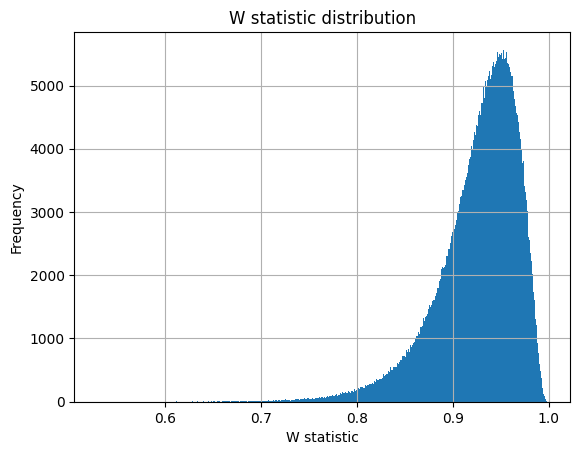

In [14]:
plt.hist(W,bins=1000)
plt.grid()
plt.title("W statistic distribution")
plt.xlabel("W statistic")
plt.ylabel("Frequency")
plt.show()

# Using our created distribution to test and comparing it with in-built shapiro test of library scipy-stats

Here we will compare the accuracies

In [15]:
iter=10000
#y=np.random.normal(200,9.5,(iter,10))
y=np.random.uniform(200,1000,(10000,n))

y=np.sort(y,axis=1)

# Standardize the matrix
mean = (np.mean(y,axis=1)).reshape(iter,1)
std_dev = (np.std(y,axis=1,ddof=1)).reshape(iter,1)
y_standardised = (y - mean) / std_dev
shapiro_stat, shapiro_p=np.array([]),np.array([])
for i, row in enumerate(y_standardised):
    shapiro_stat, shapiro_p = np.append(shapiro_stat,shapiro(row)[0]),np.append(shapiro_p,shapiro(row)[1])

W_sorted=np.sort(W)
our_stat=np.array([(((a @ row.T)**2)/(np.var(row,ddof=1)*(n-1)))[0] for row in y_standardised])
our_p=np.array([((W_sorted<i).sum())/len(W) for i in our_stat])

print(f"Accuracy of in-built test:{round((((shapiro_p>0.05).sum())/iter)*100,2)} %")

print(f"Accuracy of our test:{round((((our_p>0.05).sum())/iter)*100,2)} %\n")

Accuracy of in-built test:92.24 %
Accuracy of our test:92.07 %



# References

Harter, H. L. (1961). Expected Values of Normal Order Statistics. Biometrika, 48(1/2), 151–165.

https://math.mit.edu/~rmd/465/shapiro.pdf

Royston, J. P. (1982). Algorithm AS 177: Expected normal order statistics (exact and approximate). Journal of the royal statistical society. Series C (Applied statistics), 31(2), 161-165.

Shapiro, S. S., & Wilk, M. B. (1965). An Analysis of Variance Test for Normality (Complete Samples). Biometrika, 52(3/4), 591–611.

